In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.preprocessing as preproc
from sklearn import svm
from sklearn.decomposition import PCA

from draco.learn import preprocess
from draco.learn.helper import count_violations, current_weights
from draco.spec import Data, Field

%matplotlib inline

In [2]:
np.random.seed(1)

## Data preparation and learning functions

In [3]:
def prepare_data(data):

    N = len(data)
    num_features = len(data["positive"].columns)

    X = np.zeros((N, num_features))
    y = np.zeros(N)

    for i in range(N):

        x_pos = data["positive"].iloc[i].values
        x_neg = data["negative"].iloc[i].values

        feed_pos = np.random.choice([True, False])

        if feed_pos:
            X[i] = x_pos - x_neg
            y[i] = 1
        else:
            X[i] = x_neg - x_pos
            y[i] = 0

    return X, y

In [15]:
def learn_weights(X_train, y_train, X_dev, y_dev):

    #clf = sklearn.linear_model.LogisticRegression()
    clf = svm.LinearSVC()
    clf.fit(X_train, y_train)

    #pred = clf.predict(X_dev)
    #score = clf.score(X_dev, y_dev)
    print(clf.score(X_train, y_train))
    print(clf.score(X_dev, y_dev))
    #print(y_test)

    #print(clf.coef_)

    used_feat_idx = [i for i in range(len(clf.coef_[0])) if clf.coef_[0][i] != 0.]

    return used_feat_idx

## Program

In [4]:
data = preprocess.load_data()
N = len(data)

In [9]:
indexes = np.arange(N)
np.random.shuffle(indexes)
train_split = 0.7
dev_split = 0.1
test_split = 0.2

train_indexes = indexes[:int(N * train_split)]
dev_indexes = indexes[int(N * train_split): int(N * (train_split + dev_split))]
test_indexes = indexes[int(N * (train_split + dev_split)):]

# tmp:
train_indexes = [0, 1, 2]

train_data = data.iloc[train_indexes]
dev_data = data.iloc[dev_indexes]

X_train, y_train = prepare_data(train_data)
X_dev, y_dev = prepare_data(dev_data)

<module 'matplotlib.pyplot' from '/usr/local/anaconda3/envs/asp/lib/python3.6/site-packages/matplotlib/pyplot.py'>

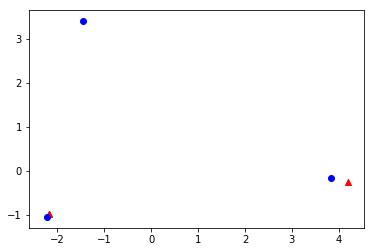

In [14]:
def prepare_plot_raw_data(data):

    N = len(data)
    num_features = len(data["positive"].columns)

    X = np.zeros((N * 2, num_features))
    y = np.zeros(N * 2)

    for i in range(N):

        x_pos = data["positive"].iloc[i].values
        x_neg = data["negative"].iloc[i].values

        X[i] = x_pos
        y[i] = 1

        X[i + N] = x_neg
        y[i + N] = 0

    return X, y

def plot_data(X, y):
    pca = PCA(n_components=2)
    X2 = pca.fit_transform(X)

    x_11 = [X2[i][0] for i in range(len(X2)) if y[i] == 0]
    x_12 = [X2[i][1] for i in range(len(X2)) if y[i] == 0]

    x_21 = [X2[i][0] for i in range(len(X2)) if y[i] == 1]
    x_22 = [X2[i][1] for i in range(len(X2)) if y[i] == 1]

    plt.scatter(x_11, x_12, marker='^', c='r')
    plt.scatter(x_21, x_22, marker='o', c='b')
    return plt
    
plot_data(*prepare_plot_raw_data(train_data))